In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df=pd.read_csv('../input/fbstock/FB.csv')
df.head()

,Date,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
0,2012-07-09,41099,31.730000,31.260000,31.900000,10945600,31.10,30.77,31.20,31.47,...,1,0,0,0,0,0,0,0,0,1
1,2012-07-10,41100,32.169998,31.990000,32.880001,17785200,30.77,31.20,31.47,31.73,...,1,0,0,1,0,1,0,0,0,0
2,2012-07-11,41101,31.469999,31.160000,32.480000,14269500,31.20,31.47,31.73,32.17,...,0,1,1,1,0,0,0,0,1,0
3,2012-07-12,41102,30.969999,30.549999,31.559999,13030300,31.47,31.73,32.17,31.47,...,0,1,0,0,0,0,0,0,1,0
4,2012-07-13,41103,30.809999,30.600000,31.400000,11300700,31.73,32.17,31.47,30.97,...,0,0,1,1,1,1,1,0,1,0


In [44]:
df.tail()

,Date,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
1603,2018-11-21,43425,132.429993,126.849998,134.160004,41939500,144.22,143.85,139.53,131.55,...,0,1,1,1,0,0,0,0,1,1
1604,2018-11-23,43427,134.820007,134.130005,137.190002,25469700,143.85,139.53,131.55,132.43,...,1,0,0,1,0,0,0,1,0,0
1605,2018-11-26,43430,131.729996,131.259995,134.500000,11886100,139.53,131.55,132.43,134.82,...,1,0,1,1,0,0,0,0,0,1
1606,2018-11-27,43431,136.380005,132.779999,137.000000,24263600,131.55,132.43,134.82,131.73,...,1,1,0,0,0,0,0,1,0,0
1607,2018-11-28,43432,135.000000,133.710007,136.610001,20750300,132.43,134.82,131.73,136.38,...,1,0,1,0,0,0,0,1,1,1


In [45]:
df.shape

(1608, 44)

In [46]:
df.isnull().sum()

Date                   0
ID                     0
Close                  0
Low                    0
High                   0
Volume                 0
C(t-5)                 0
C(t-4)                 0
C(t-3)                 0
C(t-2)                 0
C(t-4)>C(t-5)          0
C(t-3)>C(t-4)          0
C(t-2)>C(t-3)          0
C(t-1)>C(t-2)          0
MA-10                  0
MA-5                   0
WMA-10                 0
SO                     0
M                      0
SSO                    0
EMA                    0
MACD_Sline_9           0
RSI                    0
CCI                    0
ADO                    0
MA-10>C                0
MA-5>C                 0
WMA-10>C               0
SO>SOt-1               0
M>0                    0
SSO>SSOt-1             0
EMA>C                  0
MACD t-1 > MACD t-2    0
RSI70-30               0
CCI200-200             0
ADO>ADOt-1             0
HIS                    0
DAX                    0
AORD                   0
N100                   0


In [47]:
df_1=df.reset_index()['Close']
df_1

0        31.730000
1        32.169998
2        31.469999
3        30.969999
4        30.809999
           ...    
1603    132.429993
1604    134.820007
1605    131.729996
1606    136.380005
1607    135.000000
Name: Close, Length: 1608, dtype: float64

In [48]:
df_1.shape

(1608,)

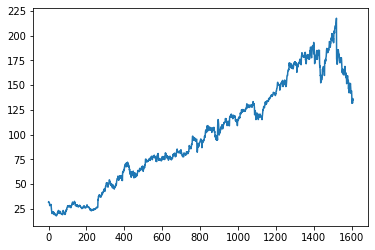

In [49]:
plt.plot(df_1)

In [50]:
np.array(df_1)

array([ 31.73    ,  32.169998,  31.469999, ..., 131.729996, 136.380005,
       135.      ])

In [51]:
# LSTM are sensitive to the scaled data. So applying minmax scaler(normalization)

from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler=MinMaxScaler(feature_range=(0,1))
# for reshaping purpose np.array() is used bcos df_1 dataframe doesnot have reshape argument.
df_1=scaler.fit_transform(np.array(df_1).reshape(-1,1))    
print(df_1.shape)
df_1

(1608, 1)


array([[0.07008059],
       [0.07228312],
       [0.06877909],
       ...,
       [0.57065623],
       [0.59393305],
       [0.58702508]])

## Preprocess the data

#### Preprocess the data------>mostly we use cross validation, random seed methods(for linear problem it is best). But in time series there will be always a relation between the previous data. 
(eg --> Take a 4 days of stock prices. In that day2 stock price have related to day1. It have some connection. And day3 stock price have sone connection with day2 and day1...like this it goes on. so while data split, for training we have to take data with respective to continious date and for testing take remaining data)

In [53]:
# Spliting the data---> for training, 65% of data and remaining for testing.

train_size=int(len(df_1)*0.65)
print(train_size)
test_size=len(df_1)-train_size
print(test_size)

1045
563


In [54]:
#Training data

print(len(df_1[:train_size,:]))     
print('\n',df_1[:train_size,:])

1045

 [[0.07008059]
 [0.07228312]
 [0.06877909]
 ...
 [0.54117233]
 [0.54257398]
 [0.54282424]]


In [55]:
#Testing data

print(len(df_1[train_size:,:]))     
#print(df_1[train_size:,:])

563


In [56]:
#Assigning variable for train and test data

train_df,test_df=df_1[:train_size,:],df_1[train_size:,:]

eg: If the stock cost is [45,78,98,65,32,15,100,15,57,45]

    Every cost value has some dependency of previous value. Here 98 has some dependency of 45 & 78.... 
    
    1. our train data is [45,78,98,65,32,15]   &   test data is [100,15,57,45]
    
    2. Now we are going to split X_train, y_train, X_test, y_test. For this we are spliting our above train data to X_train,y_train and test data to X_tesy, y_test.
    
    3. Timestep method is used here------->which means, in train data if timestep=2 then, it will take 1st 2 values as X_train and y_train will be 3rd value(assumes as predicted value). And in 2nd row it will take 2nd and 3rd values of train data as input and 4th data as output...
               
               X_train      y_train
                [45,78]       [98]
                [78,98]       [65]
                [98,65]       [32]   like this it goes on.... same for test data also
                
  FOR CREATING A DATASET OF ABOVE METHOD FUNCTION IS USED BELOW

In [63]:
def create_dataset(dataset,timestep):
    dataX, dataY=[],[]
    for i in range(len(dataset)-timestep-1):   #(range(0, 944))
        a=dataset[i:(i+timestep),0]            #If timestep=100, in 1st row 0 to 99 values is appended...2nd row 1 to 100 is appended...           
        dataX.append(a)
        dataY.append(dataset[(i+timestep),0])  #(output) In 1st row 100th value is appended...2nd row 101 value is appended...
    return np.array(dataX),np.array(dataY)

In [64]:
X_train, y_train=create_dataset(train_df,100)
X_test, y_test=create_dataset(test_df,100)

In [65]:
print(X_train.shape), print(y_train.shape)

(944, 100)
(944,)


(None, None)

In [66]:
print(X_test.shape), print(y_test.shape)

(462, 100)
(462,)


(None, None)

### Creating a stacked LSTM model

In [67]:
#reshape input as (samples,timesteps,features) which is required for LSTM

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [69]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,verbose=2)

Epoch 1/30
30/30 - 11s - loss: 0.0137 - val_loss: 0.0143
Epoch 2/30
30/30 - 5s - loss: 8.5446e-04 - val_loss: 0.0022
Epoch 3/30
30/30 - 5s - loss: 3.8904e-04 - val_loss: 0.0024
Epoch 4/30
30/30 - 5s - loss: 3.4231e-04 - val_loss: 0.0023
Epoch 5/30
30/30 - 5s - loss: 3.4854e-04 - val_loss: 0.0018
Epoch 6/30
30/30 - 5s - loss: 3.4438e-04 - val_loss: 0.0025
Epoch 7/30
30/30 - 5s - loss: 3.3790e-04 - val_loss: 0.0020
Epoch 8/30
30/30 - 4s - loss: 3.4403e-04 - val_loss: 0.0015
Epoch 9/30
30/30 - 5s - loss: 3.4903e-04 - val_loss: 0.0017
Epoch 10/30
30/30 - 5s - loss: 3.4838e-04 - val_loss: 0.0017
Epoch 11/30
30/30 - 5s - loss: 3.4126e-04 - val_loss: 0.0019
Epoch 12/30
30/30 - 5s - loss: 3.1806e-04 - val_loss: 0.0021
Epoch 13/30
30/30 - 4s - loss: 3.4501e-04 - val_loss: 0.0015
Epoch 14/30
30/30 - 5s - loss: 3.2562e-04 - val_loss: 0.0017
Epoch 15/30
30/30 - 5s - loss: 3.0839e-04 - val_loss: 0.0013
Epoch 16/30
30/30 - 5s - loss: 2.9769e-04 - val_loss: 0.0016
Epoch 17/30
30/30 - 5s - loss: 3.153

In [72]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [73]:
# Transforming back to original form

train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [74]:
train_pred

array([[ 23.537754],
       [ 24.0239  ],
       [ 24.545341],
       [ 25.065216],
       [ 25.563852],
       [ 26.029797],
       [ 26.438007],
       [ 26.787247],
       [ 27.085503],
       [ 27.340757],
       [ 27.54978 ],
       [ 27.726917],
       [ 27.851107],
       [ 27.916716],
       [ 27.947945],
       [ 27.954638],
       [ 27.944042],
       [ 27.913795],
       [ 27.858046],
       [ 27.769958],
       [ 27.664673],
       [ 27.58192 ],
       [ 27.534103],
       [ 27.542805],
       [ 27.622812],
       [ 27.761528],
       [ 27.972298],
       [ 28.260616],
       [ 28.620014],
       [ 29.013706],
       [ 29.3938  ],
       [ 29.726902],
       [ 30.003437],
       [ 30.21189 ],
       [ 30.374702],
       [ 30.507586],
       [ 30.624914],
       [ 30.742622],
       [ 30.884584],
       [ 31.02072 ],
       [ 31.144394],
       [ 31.246367],
       [ 31.297905],
       [ 31.259224],
       [ 31.137487],
       [ 30.959633],
       [ 30.742424],
       [ 30.5

In [75]:
# RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_pred))

76.0638824061319

In [76]:
math.sqrt(mean_squared_error(y_test,test_pred))

161.31464350809935

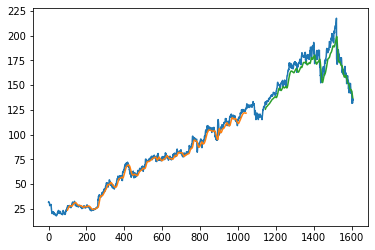

In [79]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df_1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Predict stock for next 100 days

In [80]:
len(test_df)

563

In [101]:
x_input=test_df[463:].reshape(1,-1)
x_input.shape

(1, 100)

In [102]:
x_input

array([[0.93612657, 0.9301196 , 0.92511385, 0.94703908, 0.94904143,
        0.94859086, 0.96240679, 0.95925315, 0.95289581, 0.96215649,
        0.96701208, 0.9858337 , 1.        , 0.79356257, 0.78670471,
        0.76753265, 0.77514142, 0.77048603, 0.79411321, 0.80117134,
        0.84076689, 0.83135605, 0.83821391, 0.82775189, 0.8135856 ,
        0.81253443, 0.81784052, 0.80993142, 0.7857536 , 0.78124845,
        0.77474095, 0.77534162, 0.78044751, 0.77674322, 0.7855033 ,
        0.79956954, 0.79356257, 0.79176049, 0.80047054, 0.79090953,
        0.76803326, 0.74811029, 0.72483355, 0.72738646, 0.73309302,
        0.7419032 , 0.72218051, 0.71897683, 0.72378238, 0.71507234,
        0.71367074, 0.7274866 , 0.74230367, 0.72683583, 0.73925016,
        0.73674728, 0.74695899, 0.75641986, 0.7344947 , 0.72438305,
        0.70881515, 0.72433295, 0.7064124 , 0.69880363, 0.69840316,
        0.70165688, 0.6690194 , 0.67888074, 0.68083298, 0.67973171,
        0.70606197, 0.70926565, 0.68673974, 0.68

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
temp_input

[0.9361265705561395,
 0.9301196025429244,
 0.9251138459228112,
 0.9470390849476897,
 0.9490414326475447,
 0.9485908594884116,
 0.9624067928117335,
 0.9592531461180358,
 0.9528958101817091,
 0.9621564899634578,
 0.9670120838964809,
 0.9858336987535665,
 1.0,
 0.7935625719577515,
 0.7867047054112228,
 0.7675326525504331,
 0.7751414226360316,
 0.7704860289332733,
 0.7941132051859638,
 0.8011713420433499,
 0.8407668919257145,
 0.8313560494568755,
 0.8382139109976472,
 0.8277518946788809,
 0.8135855984382039,
 0.8125344295940331,
 0.8178405215998399,
 0.8099314161285478,
 0.7857536016418882,
 0.7812484507183262,
 0.7747409520949091,
 0.7753416178605397,
 0.7804475096360814,
 0.7767432247084147,
 0.7855032987936126,
 0.7995695399709666,
 0.7935625719577515,
 0.791760494568754,
 0.8004705361165341,
 0.7909095259548482,
 0.768033258246984,
 0.7481102918356108,
 0.7248335535866246,
 0.7273864594283426,
 0.7330930219752716,
 0.7419031986784803,
 0.7221805075837213,
 0.7189768283526057,
 0.723782

In [106]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.77474095 0.77534162 0.78044751 0.77674322 0.7855033  0.79956954
 0.79356257 0.79176049 0.80047054 0.79090953 0.76803326 0.74811029
 0.72483355 0.72738646 0.73309302 0.7419032  0.72218051 0.71897683
 0.72378238 0.71507234 0.71367074 0.7274866  0.74230367 0.72683583
 0.73925016 0.73674728 0.74695899 0.75641986 0.7344947  0.72438305
 0.70881515 0.72433295 0.7064124  0.69880363 0.69840316 0.70165688
 0.6690194  0.67888074 0.68083298 0.67973171 0.70606197 0.70926565
 0.68673974 0.68238476 0.68603894 0.68408669 0.6422886  0.66686688
 0.63893475 0.62251587 0.64318967 0.6710717  0.6708715  0.66386347
 0.65550379 0.66181109 0.66977023 0.65144914 0.63688245 0.6198128
 0.62286632 0.63317816 0.63132605 0.60970115 0.56975523 0.57416025
 0.58612408 0.57065623 0.59393305 0.58702508 0.58519757 0.58050883
 0.57673037 0.57365096 0.57106876 0.56881773 0.56677496 0.56485593
 0.56300569 0.56119168 0.55939519 0.55760634 0.55582047 0.55403566
 0.55225122 0.55046713 0.54868329 0.54689968 0.5451

In [107]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [108]:
len(df_1)

1608

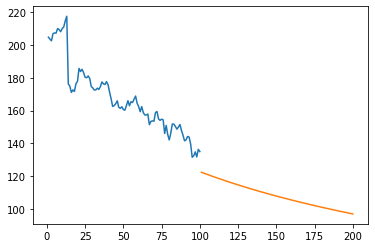

In [110]:
plt.plot(day_new,scaler.inverse_transform(df_1[1508:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

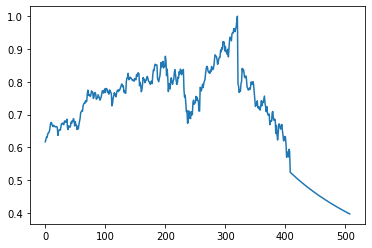

In [111]:
df3=df_1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])